In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [10]:
# Loads data to be used for training
# Training data contains 568 images with each the size of 30000
# 100 x 100 x 3 (pixel width * pixel length * rgb colors)
train = np.loadtxt('pinput.csv', delimiter = ',')
train_label = np.loadtxt('pinput_label.csv', delimiter = ',')

# Loads data to be used for testing
# Testing data contains 124 images with each the size of 30000
# 100 x 100 x 3 (pixel width * pixel length * rgb colors)
test = np.loadtxt('pinput_test.csv', delimiter = ',')
test_label = np.loadtxt('pinput_test_label.csv', delimiter = ',')

In [11]:
print("Train: ", train.shape)
print("Train Label: ", train_label.shape)
print("Test: ", test.shape)
print("Test Label: ", test_label.shape)

Train:  (568, 30000)
Train Label:  (568, 2)
Test:  (124, 30000)
Test Label:  (124, 2)


In [12]:
# Reshape data for convolutional operation
# Breakdown 30000 to 100, 100, 3
train = train.reshape(len(train), 100, 100, 3)
train_label = train_label.reshape(len(train_label), 2)
test = test.reshape(len(test), 100, 100, 3)
test_label = test_label.reshape(len(test_label), 2)

# Values are in RGB (0 - 255)
# We want to rescale them from 0 to 1 for training
# Divide all values by 255
train = train/255.0
test = test/255.0

In [13]:
print("Train: ", train.shape)
print("Train Label: ", train_label.shape)
print("Test: ", test.shape)
print("Test Label: ", test_label.shape)

Train:  (568, 100, 100, 3)
Train Label:  (568, 2)
Test:  (124, 100, 100, 3)
Test Label:  (124, 2)


In [14]:
# Sequential means that the layers are created sequentially
model = Sequential([

    # FIRST LAYER

    # Conv2D - 2D convolution layer
    
    # 32 filters - used to scan images and to produce some results that tells gives us an idea about the image's features
    # Filters aren't defined, the values are learned during the training process

    # (3, 3) - size of filter, height x width
    # 'relu' - activiation function, removes negative values
    # input shape - what kind of shape the model is expecting
    # 3 100 x 100 images
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),

    # (2, 2) - filter size, height x width
    # Down samples features to reduce image size and to reduce computational cost
    MaxPooling2D((2,2)),
    
    # SECOND LAYER

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    # Converts data into a 1-dimensional array
    Flatten(),

    # THIRD LAYER

    # Dense Layer - fully connected layers
    # 64 - number of nuerons
    # 'relu' -activation function
    Dense(64, activation = 'relu'),

    # OUTPUT LAYER

    # Only have 1 output because we're using binary classification
    # Due to that, we're using the sigmoid activation function, result will range from 0 to 1
    Dense(2, activation = 'softmax')
])

In [15]:
# Add our loss function and back propagation model

# Loss Function
# categorical_crossentropy computes the loss between the true labels and predicted labels

# Back  Propagation
# adam is a stochastic gradient descent method

# Metrics
# A function that is used to judge the performance of the model
# Similar to loss functions, but the results aren't used for training the model
# accuracy calculates how often predicitons equal to the labels
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
# fit trains the data
# train and train_label are inputs
# epochs are the number of times we want to train the model
# batch size is the number of samples we want to use to train the model
model.fit(train, train_label, epochs = 10, batch_size = 64)

Epoch 1/10
9/9 [==============================] - 3s 234ms/step - loss: 1.0985 - accuracy: 0.4894
Epoch 2/10
9/9 [==============================] - 2s 238ms/step - loss: 0.6558 - accuracy: 0.5176
Epoch 3/10
9/9 [==============================] - 2s 244ms/step - loss: 0.6004 - accuracy: 0.6849
Epoch 4/10
9/9 [==============================] - 2s 222ms/step - loss: 0.4862 - accuracy: 0.8028
Epoch 5/10
9/9 [==============================] - 2s 223ms/step - loss: 0.4144 - accuracy: 0.8310
Epoch 6/10
9/9 [==============================] - 2s 241ms/step - loss: 0.3354 - accuracy: 0.8644
Epoch 7/10
9/9 [==============================] - 2s 224ms/step - loss: 0.2916 - accuracy: 0.8838
Epoch 8/10
9/9 [==============================] - 2s 227ms/step - loss: 0.2533 - accuracy: 0.8996
Epoch 9/10
9/9 [==============================] - 2s 233ms/step - loss: 0.2090 - accuracy: 0.9243
Epoch 10/10
9/9 [==============================] - 2s 246ms/step - loss: 0.1817 - accuracy: 0.9401


In [17]:
# Evaluate model's performance on the testing data
model.evaluate(test, test_label)

# Low accuracy can be due to the small dataset

4/4 [==============================] - 0s 32ms/step - loss: 0.4919 - accuracy: 0.7742


[0.4919385015964508, 0.774193525314331]

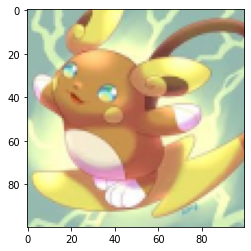

[[0.7348857 0.2651143]]
It's raichu!


In [18]:
# Get a random image
rand = random.randint(0, len(test_label))
plt.imshow(test[rand])
plt.show()

# Reshape image
# Pass it to our model
y_pred = model.predict(test[rand].reshape(1, 100, 100, 3))
print(y_pred);

# Classify it as either pikachu or raichu
if(y_pred[0][0] < y_pred[0][1]):
    print("It's pikachu!")
else:
    print("It's raichu!")
    